<a href="https://colab.research.google.com/github/simranbhurat/DM2-Project/blob/master/eda/DMC_EDA_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Category Hierarchy

## 1. Read DMC files

In [1]:
!git clone -l -s https://github.com/simranbhurat/DM2-Project.git 

fatal: destination path 'DM2-Project' already exists and is not an empty directory.


In [2]:
import pandas as pd


print('Orders Dataframe: \n')
orders = pd.read_csv('DM2-Project/src/data/orders.csv', sep='|')
print(orders.info(), '\n')
orders.head()

Orders Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071538 entries, 0 to 1071537
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1071538 non-null  object
 1   userID  1071538 non-null  int64 
 2   itemID  1071538 non-null  int64 
 3   order   1071538 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 32.7+ MB
None 



,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


In [3]:
print('Items Dataframe: \n')
items = pd.read_csv('DM2-Project/src/data/items.csv', sep='|')
print(items.info(), '\n')
print(items.describe(), '\n')
items.head()

Items Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32776 entries, 0 to 32775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   itemID      32776 non-null  int64 
 1   brand       32776 non-null  int64 
 2   feature_1   32776 non-null  int64 
 3   feature_2   32776 non-null  int64 
 4   feature_3   32776 non-null  int64 
 5   feature_4   32776 non-null  int64 
 6   feature_5   32776 non-null  int64 
 7   categories  25988 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.0+ MB
None 

             itemID         brand     feature_1     feature_2     feature_3  \
count  32776.000000  32776.000000  32776.000000  32776.000000  32776.000000   
mean   16387.500000    702.776574      6.451062      0.817946    440.280388   
std     9461.760548    432.774074      2.744884      0.778284    132.566994   
min        0.000000     -1.000000     -1.000000      0.000000     -1.000000   
25%     8193.750000  

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [4]:
print('Category Hierarchy Dataframe: \n')
hierarchy = pd.read_csv(
    'DM2-Project/src/data/category_hierarchy.csv', 
    sep='|'
)
print(hierarchy.info(), '\n')
hierarchy.head()

Category Hierarchy Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   category         4332 non-null   int64
 1   parent_category  4332 non-null   int64
dtypes: int64(2)
memory usage: 67.8 KB
None 



,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


## 2. Hierarchical Levels

In [5]:
hierarchy['level'] = 0

root_index = hierarchy[hierarchy['category']==hierarchy['parent_category']].index
hierarchy.loc[root_index, 'level'] = 1
root_categories = list(hierarchy.loc[root_index, 'category'])

level_1_index = hierarchy.query(
    'parent_category in @root_categories and category not in @root_categories'
).index

level_index = level_1_index

for level in range(1, 14):
    hierarchy.loc[level_index, 'level'] = level + 1
    level_categories = list(hierarchy[hierarchy['level']==level+1]['category'])
    next_level_index = hierarchy.query(
        'parent_category in @level_categories and category not in @level_categories'
    ).index
    level_index = next_level_index

level_0_index = hierarchy[hierarchy['level']==0]['category'].index
hierarchy.drop(index=level_0_index, inplace=True)

hierarchy.sort_values(by='level').head(10)

,category,parent_category,level
3930,3898,3898,1
4331,4299,3898,2
4035,4003,3898,2
384,381,3898,2
4036,4004,3898,2
4037,4005,3898,2
4038,4006,3898,2
2887,2863,3898,2
4039,4007,3898,2
4040,4008,3898,2


level
1       1
2     485
3     668
4    1949
5     865
6     234
7      78
8       9
9      22
Name: category, dtype: int64


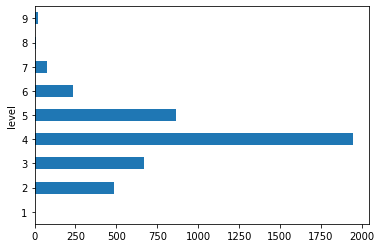

In [6]:
print(hierarchy.groupby(['level'])['category'].count())
hierarchy.groupby(['level'])['category'].count().plot(kind='barh')

In [7]:
hierarchy.describe()

,category,parent_category,level
count,4311.000000,4311.000000,4311.000000
mean,2148.108559,2205.317328,4.016701
std,1241.497665,1222.949943,1.161325
min,0.000000,8.000000,1.000000
25%,1071.500000,1147.000000,3.000000
50%,2148.000000,2284.000000,4.000000
75%,3222.500000,3329.000000,5.000000
max,4299.000000,3898.000000,9.000000


## 3. Level 2 category of each leaf

In [8]:
def get_parent_level_k_from(category, k=2):
    current_level = hierarchy[hierarchy['category']==category]['level'].values[0]
    
    parent = hierarchy[hierarchy['category']==category]['parent_category'].values[0]

    if current_level <=2:
        return category
    
    elif current_level==3:
        return parent
    
    else:
        current_level -= 1

        while current_level > k:
            next_parent = hierarchy[hierarchy['category']==parent]['parent_category'].values[0]
            current_level -= 1
            parent = next_parent
        
        return parent

get_parent_level_k_from(3325)

3624

In [9]:
hierarchy['level_2_category'] = hierarchy['category'].apply(get_parent_level_k_from)
hierarchy['level_2_category'].nunique()

486

## 4. Visualize tree

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

hierarchy_graph = nx.from_pandas_edgelist(
    df=hierarchy,
    source='category',
    target='parent_category'
)

hubs, authorities = nx.hits(hierarchy_graph, normalized=False)

max_authority = sorted(list(authorities.values()), reverse=True)[0]
max_authority

0.713745159124934

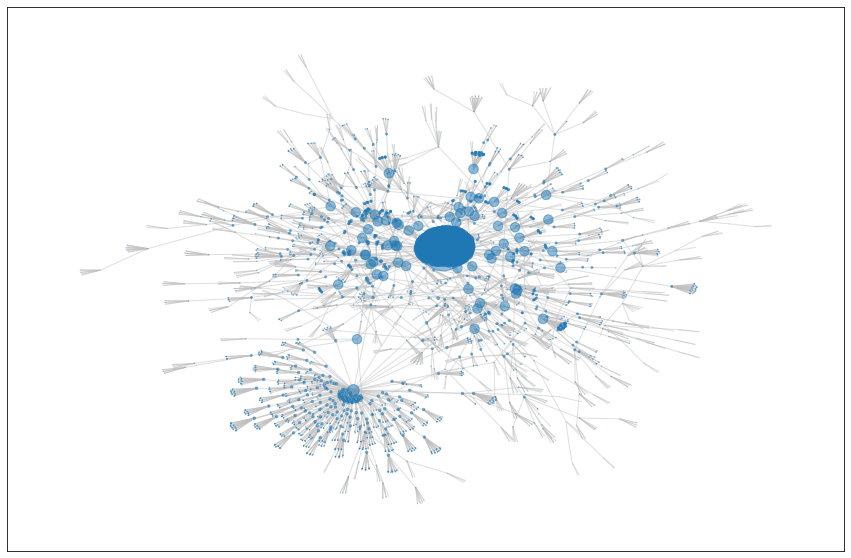

In [11]:
nodelist = list(authorities.keys())
node_size = [value * 2000 / max_authority for value in authorities.values()]

nx.draw_networkx(
    hierarchy_graph, 
    with_labels=False, 
    alpha=0.5,
    nodelist=nodelist, 
    node_size=node_size,
    edge_color="silver",
)
fig = plt.gcf()
fig.set_size_inches(15 , 10)
plt.show()

In [12]:
authorities_df = pd.DataFrame(
    [{'node': k, 'authority': v} for k, v in authorities.items()]
)

authorities_df.sort_values(by='authority', ascending=False).head(10)

,node,authority
68,3898,0.713745
17,2364,0.048166
319,2231,0.033986
103,1666,0.033337
198,600,0.033199
846,2346,0.032666
308,1062,0.032598
195,3624,0.032595
72,678,0.032536
696,1480,0.032531


In [13]:
processed_hierarchy = pd.merge(
    hierarchy, 
    authorities_df, 
    how='left', 
    left_on='category', 
    right_on='node',
).drop(columns=['node'])

processed_hierarchy.head()

,category,parent_category,level,level_2_category,authority
0,0,75,4,2364,0.000096
1,1,1499,5,2723,0.000003
2,2,1082,4,2231,0.000068
3,3,3498,4,2364,0.000097
4,4,1623,4,1825,0.000066


## 5. Items Category reduction

2     6877
0     6788
1     6564
3     4447
4     2696
5     1689
6     1220
7      863
8      555
9      308
10     246
11     166
12     116
13      83
14      50
15      34
16      22
17      14
18       7
20       7
19       6
21       5
22       5
33       2
23       2
25       1
29       1
35       1
24       1
Name: categories, dtype: int64


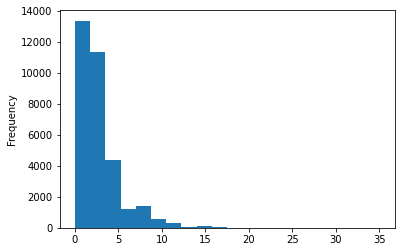

In [14]:
print(items['categories'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0).value_counts())
items['categories'].apply(
    lambda x: len(eval(x)) if isinstance(x, str) else 0
).plot(kind='hist', bins=20)

2     8313
1     7903
0     6788
3     4434
4     2092
5     1200
6      809
7      579
8      311
9      160
10      97
11      37
12      24
13      16
15       5
14       3
18       3
19       1
16       1
Name: categories_level_2, dtype: int64


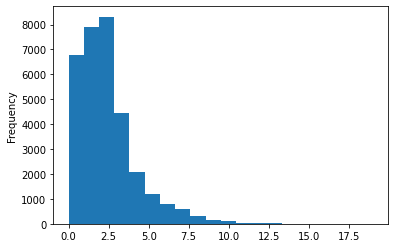

In [15]:
def get_item_categories_level_2(item_categories_string):
    if isinstance(item_categories_string, str):
        item_categories_list = eval(item_categories_string)
        level_2_categories = set()
        for category in item_categories_list:
            level_2_category = processed_hierarchy[
                processed_hierarchy['category']==category
            ]['level_2_category'].values[0]
            level_2_categories.add(level_2_category)
        return str(list(level_2_categories))

items['categories_level_2'] = items['categories'].apply(get_item_categories_level_2)
print(items['categories_level_2'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0).value_counts())
items['categories_level_2'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0).plot(kind='hist', bins=20)

## 6. Items Categories sparse matrix

In [16]:
item_category_matrix = items[['itemID', 'categories_level_2']]
for level_2_category in processed_hierarchy['level_2_category'].unique():
    item_category_matrix[f'category_{level_2_category}'] = item_category_matrix['categories_level_2'].apply(
        lambda x: level_2_category in eval(x) if isinstance(x, str) else False
    ) * 1

item_category_matrix.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


(32776, 488)

In [17]:
item_category_matrix.head()

,itemID,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,category_34,category_600,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
0,22665,"[2012, 3909, 2838, 3908]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28640,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13526,"[3912, 3913, 3914, 3915, 3860, 600, 2364]",1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,21399,[2364],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8504,[1072],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Sales per category

In [19]:
orders['date'] = pd.to_datetime(orders['date'])
orders['week'] = orders['date'] - pd.to_timedelta(
    orders['date'].dt.dayofweek, 
    unit='d'
)

item_sales_per_week = orders.groupby(by=['week', 'itemID'])['order'].sum().reset_index()
item_sales_per_week.sample(10)

,week,itemID,order
163934,2020-10-12,13578,3
166967,2020-10-12,25515,1
111766,2020-08-31,3166,3
92615,2020-08-10,29118,1
108068,2020-08-24,21901,6
170259,2020-10-19,5798,23
32338,2020-06-22,27044,1
298908,2021-01-25,24190,13
35397,2020-06-29,5616,3
25681,2020-06-22,2277,8


In [20]:
order_categories = pd.merge(
    item_sales_per_week,
    item_category_matrix,
    how='inner',
    on='itemID'
)

order_categories.sample(5)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
42517,2020-10-12,7548,17,[3860],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39762,2021-01-11,7095,3,"[1072, 2012, 3999]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270795,2020-12-14,8097,2,"[1480, 2793]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144936,2020-08-10,25734,3,"[3330, 959]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287389,2021-01-18,12674,2,"[2723, 519]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
for column in order_categories.columns:
    if column.startswith('category_'):
        order_categories[column] = order_categories[column] * order_categories['order']

order_categories.sample(5)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
291318,2020-12-28,15057,3,None,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123018,2020-10-19,21666,2,"[3914, 3915, 1840, 600, 2011, 2364]",2,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
57691,2020-11-09,10281,2,"[2793, 3444]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280964,2020-08-24,26214,1,"[275, 3860, 965]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52857,2020-07-06,9345,1,None,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
order_categories.sample(10)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
168051,2020-08-03,29804,3,"[2364, 965]",3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100884,2020-11-16,18179,1,"[2928, 275, 2364, 965]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212057,2020-07-06,30062,1,"[275, 2364, 965]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46547,2020-11-16,8337,11,"[2762, 1682, 1557]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211273,2021-01-18,29186,3,[686],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87534,2020-12-07,15700,11,"[2011, 2723, 519]",0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192355,2020-11-16,7982,4,[2346],0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
167164,2020-10-19,29654,4,"[2364, 252, 519]",4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201327,2020-07-20,17842,1,"[432, 366]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80530,2021-01-11,14339,7,"[2364, 366]",7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
order_categories = order_categories.drop(
    columns=['itemID', 'order', 'categories_level_2']
).groupby('week').sum()

order_categories

,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,category_34,category_600,category_678,category_432,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
week,,,,,,,,,,,,,,,,,,,,,
2020-06-01,16921,2143,10585,1309,5168,4779,1501,928,1174,515,...,14,0,0,0,0,0,0,0,0,0
2020-06-08,11507,1317,7400,959,3415,3228,986,550,762,277,...,4,0,0,0,0,0,1,0,0,0
2020-06-15,13834,1599,9393,1233,4201,3962,1259,663,969,305,...,11,0,0,0,0,0,0,0,0,0
2020-06-22,14845,1776,9605,1404,4466,4548,1286,712,940,385,...,20,0,0,1,0,0,1,0,1,0
2020-06-29,16475,1855,10581,1543,5173,5269,1478,808,955,333,...,23,0,1,1,0,0,0,0,1,0
2020-07-06,15603,1823,9870,1459,4890,5036,1441,842,931,388,...,14,0,1,1,0,0,0,0,1,0
2020-07-13,13325,1518,8746,1536,4398,4478,1291,603,802,708,...,7,0,0,2,0,0,0,0,2,0
2020-07-20,11778,1470,7674,1157,3878,3882,1087,576,689,347,...,9,0,1,3,0,0,0,0,3,0
2020-07-27,12470,1482,8297,1507,3982,4189,1173,722,808,406,...,7,0,0,1,0,0,0,0,1,0


## 8. Seasonality Analysis

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


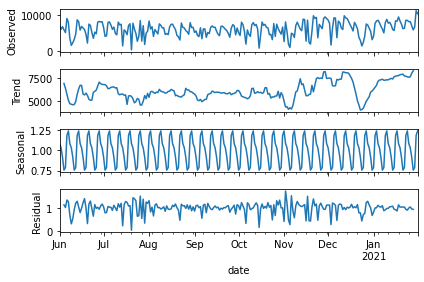

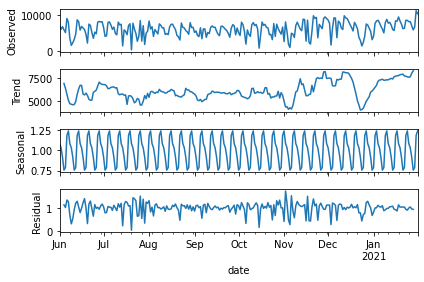

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

sales_per_day = orders.groupby('date')['order'].sum()
decomposition = seasonal_decompose(
    sales_per_day, 
    # freq=30,
    model="multiplicative",
)

# print(decomposition.trend)
# print(decomposition.seasonal)
# print(decomposition.resid)
# print(decomposition.observed)
decomposition.plot()

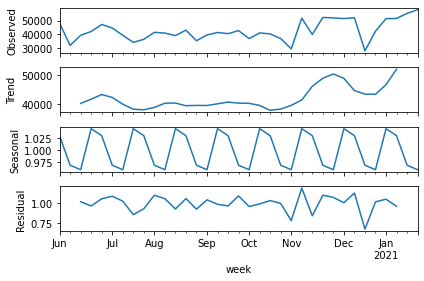

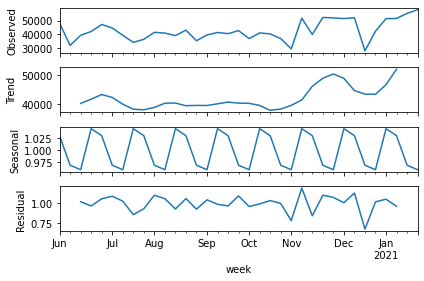

In [25]:
sales_per_week = item_sales_per_week.groupby('week')['order'].sum()
decomposition = seasonal_decompose(
    sales_per_week, 
    freq=4,
    model="multiplicative",
)

# print(decomposition.trend)
# print(decomposition.seasonal)
# print(decomposition.resid)
# print(decomposition.observed)
decomposition.plot()

## 9. Replenishment Analysis

In [26]:
orders['user_item'] = orders['userID'].apply(str) + '_' + orders['itemID'].apply(str)
orders['order_count'] = orders.sort_values(['week']).groupby(['user_item']).cumcount() + 1
orders['amount_previous_order'] = orders.sort_values(by=['week']).groupby(['user_item'])['order'].shift(1)
orders['week_previous_order'] = orders.sort_values(by=['week']).groupby(['user_item'])['week'].shift(1)
orders['weeks_since_last_order'] = (orders['week'] - orders['week_previous_order']).apply(lambda x: x.days/7)
orders['week_next_order'] = orders.sort_values(by=['week']).groupby(['user_item'])['week'].shift(-1)
orders['weeks_until_next_order'] = (orders['week_next_order'] - orders['week']).apply(lambda x: x.days/7)

orders.sort_values(by=['user_item', 'week'])

,date,userID,itemID,order,week,user_item,order_count,amount_previous_order,week_previous_order,weeks_since_last_order,week_next_order,weeks_until_next_order
268197,2020-08-03,0,12468,1,2020-08-03,0_12468,1,NaN,NaT,NaN,NaT,NaN
334333,2020-08-18,0,12505,1,2020-08-17,0_12505,1,NaN,NaT,NaN,NaT,NaN
1031053,2021-01-25,0,13146,2,2021-01-25,0_13146,1,NaN,NaT,NaN,NaT,NaN
390966,2020-09-01,0,1505,1,2020-08-31,0_1505,1,NaN,NaT,NaN,NaT,NaN
268196,2020-08-03,0,15083,1,2020-08-03,0_15083,1,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
634015,2020-10-31,9,19281,1,2020-10-26,9_19281,1,NaN,NaT,NaN,NaT,NaN
207504,2020-07-18,9,20607,1,2020-07-13,9_20607,1,NaN,NaT,NaN,NaT,NaN
634013,2020-10-31,9,2890,1,2020-10-26,9_2890,1,NaN,NaT,NaN,NaT,NaN
583676,2020-10-19,9,4135,1,2020-10-19,9_4135,1,NaN,NaT,NaN,NaT,NaN


In [27]:
orders.describe()

,userID,itemID,order,order_count,amount_previous_order,weeks_since_last_order,weeks_until_next_order
count,1.071538e+06,1.071538e+06,1.071538e+06,1.071538e+06,175112.000000,175112.000000,175112.000000
mean,2.307968e+04,1.652196e+04,1.399758e+00,1.273973e+00,1.640630,10.424426,10.424426
std,1.331930e+04,9.451299e+03,1.479233e+00,8.262606e-01,1.639806,6.728057,6.728057
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000000
25%,1.152400e+04,8.350000e+03,1.000000e+00,1.000000e+00,1.000000,5.000000,5.000000
50%,2.310300e+04,1.696000e+04,1.000000e+00,1.000000e+00,1.000000,9.000000,9.000000
75%,3.465500e+04,2.457900e+04,1.000000e+00,1.000000e+00,2.000000,14.000000,14.000000
max,4.613700e+04,3.277500e+04,1.000000e+02,2.900000e+01,100.000000,34.000000,34.000000


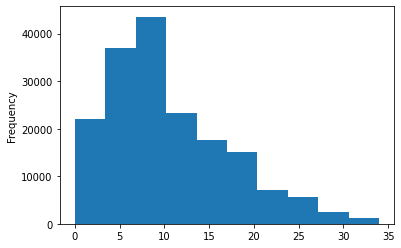

In [28]:
orders['weeks_since_last_order'].plot(kind='hist')

In [29]:
first_purchased = orders.groupby('itemID')['userID'].nunique().rename('distinct_users')
ordered_twice_or_more = orders[orders['order_count']==2]\
    .groupby('itemID')['userID']\
    .count()\
    .rename('replenishments')

replenishments = pd.concat([first_purchased, ordered_twice_or_more], axis=1).fillna(0)
replenishments['item_replenishment_rate'] = replenishments['replenishments'] / replenishments['distinct_users']
replenishments.head()

,distinct_users,replenishments,item_replenishment_rate
itemID,,,
0,1,0.0,0.000
1,8,1.0,0.125
2,1,0.0,0.000
3,4,0.0,0.000
4,5,0.0,0.000


In [30]:
item_category_matrix = pd.merge(
    item_category_matrix,
    replenishments,
    how='left',
    on='itemID'
)

categories = [
    column for column in item_category_matrix.columns if column.startswith('category_')
]

In [31]:
category_replenishment_rates = item_category_matrix[categories].values.transpose()\
    .dot(item_category_matrix['item_replenishment_rate'].fillna(0).values)\
    * (1 / item_category_matrix[categories].sum().values) 

category_replenishments = pd.Series(
    category_replenishment_rates, 
    index=categories, 
    name='category_replenishment_rate'
).fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


In [32]:
def get_avg_category_replenishment_rate(category_list_str):
    if isinstance(category_list_str, str):
        category_list = eval(category_list_str)
        if len(category_list) > 0:
            category_replenishment_rates = []
            for category in category_list:
                category_replenishment_rate = category_replenishments[
                    f'category_{category}'
                ]
                category_replenishment_rates.append(category_replenishment_rate)
            return sum(category_replenishment_rates)/len(category_replenishment_rates)

items['item_replenishment_rate'] = item_category_matrix['item_replenishment_rate']
items['categories_replenishment_rate'] = items['categories_level_2'].apply(
    get_avg_category_replenishment_rate
)
items.head(10)

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories,categories_level_2,item_replenishment_rate,categories_replenishment_rate
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]","[2012, 3909, 2838, 3908]",0.000000,0.124382
1,28640,1366,10,1,537,0,101,NaN,None,1.000000,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...","[3912, 3913, 3914, 3915, 3860, 600, 2364]",0.068493,0.116258
3,21399,1090,10,1,511,0,0,[3270],[2364],0.000000,0.112449
4,8504,768,4,1,484,0,66,[2470],[1072],0.083333,0.141670
5,32122,5,4,1,491,0,66,NaN,None,0.000000,NaN
6,31956,1388,4,0,491,0,66,"[236, 3625, 356]",[2346],0.000000,0.090015
7,6237,1492,4,1,491,3,66,"[2658, 1686]","[2364, 2109]",0.000000,0.117538
8,16971,288,6,0,314,0,45,"[390, 2678, 1708]","[3624, 252, 519]",0.067039,0.109537
9,18385,288,6,0,314,0,45,"[390, 1708]","[252, 519]",0.131313,0.114249


In [33]:
items.to_csv('items_processed.csv', sep='|', index=False)
orders.to_csv('orders_processed.csv', sep='|', index=False)
item_category_matrix.to_csv('item_category_matrix.csv', sep='|', index=False)